<a href="https://colab.research.google.com/github/coderhouse2025-droid/SUPERTIENDA/blob/main/Supertienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Montar Google Drive en este entorno de Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalar gdown (herramienta diseñada para facilitar la descarga de archivos de Google Drive a través de comandos de línea de
comandos. )

In [ ]:
!pip install -q gdown

Descargar base de datos de Supertienda desde Goog le Drive

In [6]:
file_id = '1d45NdxZYAJMh7an2sJNgLwTWnUUaMClQ'
output_filename = 'Supertienda.xlsx'
!gdown --id $file_id -O $output_filename

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1d45NdxZYAJMh7an2sJNgLwTWnUUaMClQ
To: /content/Supertienda.xlsx
100% 1.45M/1.45M [00:00<00:00, 87.0MB/s]


Importar Pandas ((biblioteca de código abierto diseñada para facilitar el análisis y manipulación de datos en Python))

In [7]:
import pandas as pd
df = pd.read_excel("/content/Supertienda.xlsx")
display(df.head())

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País/Región,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Venta,Cantidad,Descuento,Ganancia
0,128,AR-2021-112368,2021-06-08,2021-06-12,Rápido,TJ-21265,Tito Jáquez,Empresa,Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,Sur,MAT-AR-10003530,Material de oficina,Arte,"Stanley Bolígrafos, Azul",160.80,4,0.4,-53.60
1,129,AR-2021-112368,2021-06-08,2021-06-12,Rápido,TJ-21265,Tito Jáquez,Empresa,Buenos Aires,Ciudad Autónoma de Buenos Aires,Argentina,Sur,MAT-PA-10001901,Material de oficina,Papel,"Green Bar Agenda, Paquete de 12",111.72,1,0.4,-1.88
2,133,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-PA-10000460,Material de oficina,Papel,"Enermax Agenda, Multicolor",669.48,7,0.4,-167.72
3,134,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-PA-10003747,Material de oficina,Papel,"SanDisk Papel de tipo pergamino, Multicolor",652.32,9,0.4,85.32
4,135,AR-2020-130631,2020-09-17,2020-09-22,Rápido,RZ-20275,Rafel Zarate,Cliente,Resistencia,Chaco,Argentina,Sur,MAT-AL-10002870,Material de oficina,Almacenamiento,"Tenex Casilleros, Industrial",4092.60,5,0.4,204.60


Importar Squite3 (SQLite es un sistema de gestión de bases de datos relacional ligero, autónomo y sin servidor, ideal para aplicaciones
que requieren almacenamiento local de datos)

In [8]:
import sqlite3

Conectar con el archivo (cargar el DataFrame actual (df) en una tabla llamada 'supertienda_table' y luego consultaré las tablas de esta nueva base de datos. Esto permitirá usar SQL con tus dato)

In [9]:
conn = sqlite3.connect(':memory:') # Create an in-memory SQLite database
df.to_sql('supertienda_table', conn, if_exists='replace', index=False)

tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table'",
    conn
)
print("Tablas encontradas:", tables['name'].tolist())

Tablas encontradas: ['supertienda_table']


Ejecutar la celda para listar las tablas de la base de datos Supertienda_table

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id. de la fila       11964 non-null  int64         
 1   Id. del pedido       11964 non-null  object        
 2   Fecha del pedido     11964 non-null  datetime64[ns]
 3   Fecha de envío       11964 non-null  datetime64[ns]
 4   Forma de envío       11964 non-null  object        
 5   Id. del cliente      11964 non-null  object        
 6   Nombre del cliente   11964 non-null  object        
 7   Segmento             11964 non-null  object        
 8   Ciudad               11964 non-null  object        
 9   Estado               11964 non-null  object        
 10  País/Región          11964 non-null  object        
 11  Región               11964 non-null  object        
 12  Id. del producto     11964 non-null  object        
 13  Categoría            11964 non-

Data Clearing

Verificar y eliminar filas duplicadas


In [11]:
print(f"Número de filas antes de eliminar duplicados: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {len(df)}")

Número de filas antes de eliminar duplicados: 11964
Número de filas después de eliminar duplicados: 11964


Convertir columnas categóricas a tipo 'category\(Convertir columnas categóricas a tipo 'category'
Esto optimiza el uso de memoria y puede mejorar el rendimiento en ciertas operaciones).

In [12]:
categorical_cols = [
    'Forma de envío', 'Segmento', 'Ciudad', 'Estado', 'País/Región',
    'Región', 'Categoría', 'Subcategoría'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("Tipos de datos actualizados para columnas categóricas:")
display(df[categorical_cols].info())

Tipos de datos actualizados para columnas categóricas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Forma de envío  11964 non-null  category
 1   Segmento        11964 non-null  category
 2   Ciudad          11964 non-null  category
 3   Estado          11964 non-null  category
 4   País/Región     11964 non-null  category
 5   Región          11964 non-null  category
 6   Categoría       11964 non-null  category
 7   Subcategoría    11964 non-null  category
dtypes: category(8)
memory usage: 149.4 KB


None

Mostrar información general del DataFrame después de la limpieza


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11964 entries, 0 to 11963
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id. de la fila       11964 non-null  int64         
 1   Id. del pedido       11964 non-null  object        
 2   Fecha del pedido     11964 non-null  datetime64[ns]
 3   Fecha de envío       11964 non-null  datetime64[ns]
 4   Forma de envío       11964 non-null  category      
 5   Id. del cliente      11964 non-null  object        
 6   Nombre del cliente   11964 non-null  object        
 7   Segmento             11964 non-null  category      
 8   Ciudad               11964 non-null  category      
 9   Estado               11964 non-null  category      
 10  País/Región          11964 non-null  category      
 11  Región               11964 non-null  category      
 12  Id. del producto     11964 non-null  object        
 13  Categoría            11964 non-

### Exploración de Datos (EDA - Exploratory Data Analysis)

Resumen estadístico de las columnas numéricas

(El método `describe()` proporciona estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores `NaN`).

Visualización de la distribución de 'Venta' y 'Ganancia'

(histogramas para observar la forma general de la distribución y los box plots para identificar la mediana, los cuartiles y la presencia de valores atípicos).

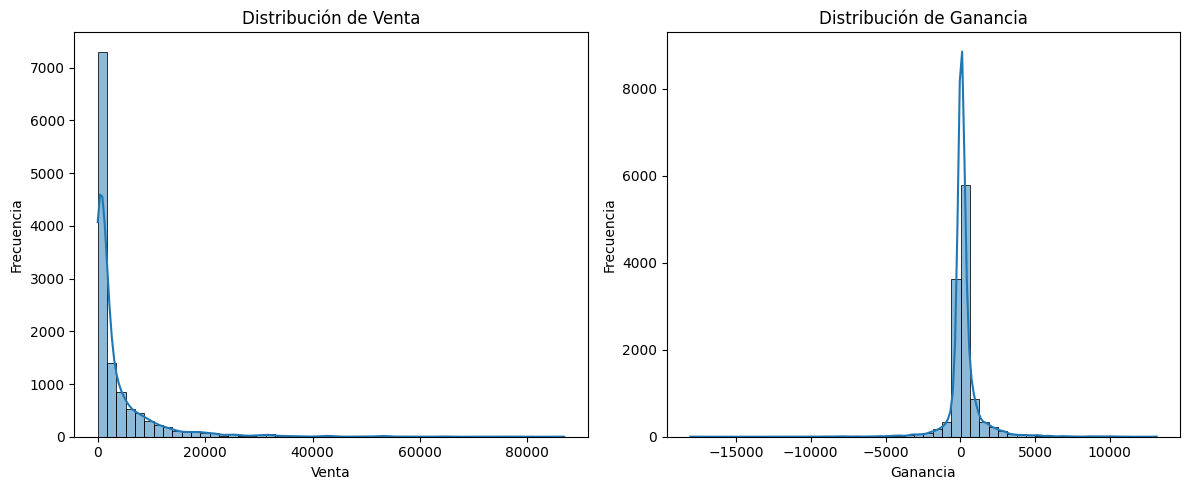

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histograma de 'Venta'
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.histplot(df['Venta'], bins=50, kde=True)
plt.title('Distribución de Venta')
plt.xlabel('Venta')
plt.ylabel('Frecuencia')

# Histograma de 'Ganancia'
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(df['Ganancia'], bins=50, kde=True)
plt.title('Distribución de Ganancia')
plt.xlabel('Ganancia')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

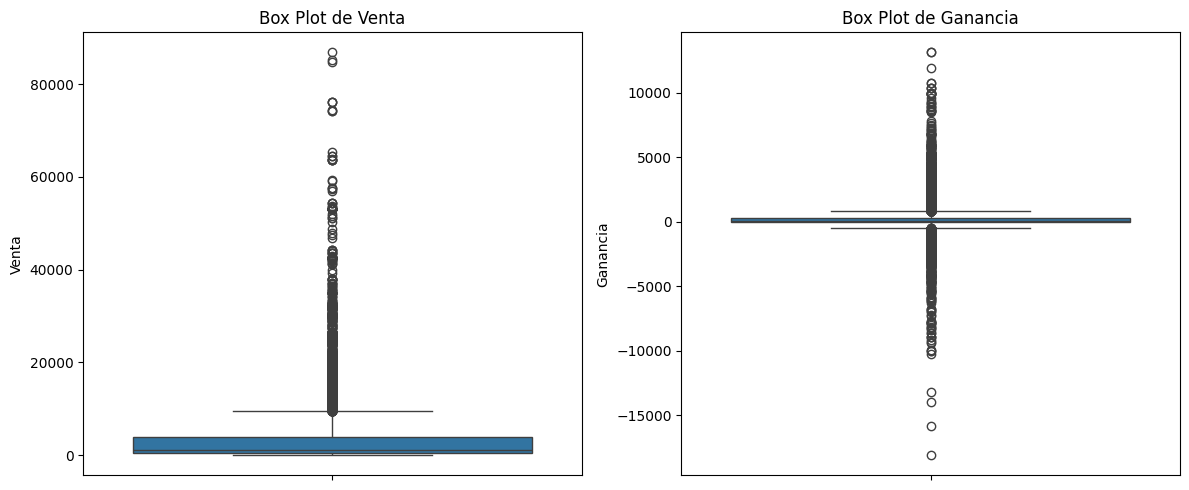

In [17]:
plt.figure(figsize=(12, 5))

# Box plot de 'Venta'
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.boxplot(y=df['Venta'])
plt.title('Box Plot de Venta')
plt.ylabel('Venta')

# Box plot de 'Ganancia'
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.boxplot(y=df['Ganancia'])
plt.title('Box Plot de Ganancia')
plt.ylabel('Ganancia')

plt.tight_layout()
plt.show()

In [14]:
display(df.describe())

,Id. de la fila,Fecha del pedido,Fecha de envío,Venta,Cantidad,Descuento,Ganancia
count,11964.000000,11964,11964,11964.000000,11964.000000,11964.000000,11964.000000
mean,5982.500000,2021-06-02 17:11:51.334001920,2021-06-06 16:29:07.642928640,3686.704066,3.740388,0.134677,214.777803
min,1.000000,2019-01-01 00:00:00,2019-01-05 00:00:00,15.660000,1.000000,0.000000,-18062.400000
25%,2991.750000,2020-05-29 00:00:00,2020-06-01 00:00:00,352.200000,2.000000,0.000000,-5.970000
50%,5982.500000,2021-05-23 00:00:00,2021-05-26 00:00:00,1002.600000,3.000000,0.000000,80.000000
75%,8973.250000,2022-06-08 00:00:00,2022-06-12 00:00:00,3988.395000,5.000000,0.400000,327.600000
max,11964.000000,2023-12-31 00:00:00,2023-12-31 00:00:00,86852.000000,14.000000,0.800000,13132.800000
std,3453.853645,NaN,NaN,6913.171038,2.200356,0.195480,1201.562890


 Exploración de columnas categóricas

(Para ver cuántos valores únicos hay y cuáles son las categorías más frecuentes. Esto nos ayuda a entender la diversidad de los datos en cada categoría).

In [15]:
categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print(f"Número de valores únicos: {df[col].nunique()}")


Columna: Forma de envío
Forma de envío
Estándar     7180
Rápido       2485
Urgente      1697
Mismo día     602
Name: count, dtype: int64
Número de valores únicos: 4

Columna: Segmento
Segmento
Cliente            6192
Empresa            3566
Pequeña empresa    2206
Name: count, dtype: int64
Número de valores únicos: 3

Columna: Ciudad
Ciudad
Managua             740
Santo Domingo       516
Ciudad de México    481
Tegucigalpa         391
San Salvador        256
                   ... 
Araraquara            1
Uberlândia            1
Arcoverde             1
Valle Hermoso         1
Abreu e Lima          1
Name: count, Length: 579, dtype: int64
Número de valores únicos: 579

Columna: Estado
Estado
Managua              740
San Salvador         738
Distrito Federal     556
Distrito Nacional    516
Guatemala            465
                    ... 
Lima                   1
La Rioja               1
Meta                   1
Río Negro              1
Paysandú               1
Name: count, Length: 199

### Hallazgos Principales del EDA

1.  **Estado del DataFrame:** cargado y limpiado el DataFrame **df**. No se encontraron filas duplicadas y las columnas categóricas se han convertido al tipo **category** para optimizar el rendimiento y el uso de memoria.

2.  **Características de las Ventas y Ganancias:**
    *   **Venta y Ganancia** muestran distribuciones altamente sesgadas a la derecha, con una gran cantidad de valores en el rango inferior y una 'cola larga' de valores muy altos.
    *   Ambas columnas presentan **numerosos valores atípicos (outliers)**. En particular, **Ganancia** tiene valores negativos significativos (pérdidas), llegando a -18062.40, lo que sugiere la existencia de transacciones no rentables que requieren un análisis más profundo.
    *   A pesar de las pérdidas, la ganancia promedio es positiva, pero la presencia de estas pérdidas es un punto crítico.

3.  **Patrones en Datos Categóricos:**
    *   **Forma de Envío:** La opción 'Estándar' es la más utilizada.
    *   **Segmento de Clientes:** La mayoría de los clientes pertenecen al segmento 'Cliente', seguido de 'Empresa' y 'Pequeña empresa'.
    *   **Geografía:** Hay una amplia distribución geográfica, con 579 ciudades y 199 estados únicos. 'México' es el país con más transacciones y las regiones 'Centro' y 'Sur' son las más activas.
    *   **Categorías de Producto:** 'Material de oficina' es la categoría principal en volumen, seguida por 'Mobiliario' y 'Tecnología'. Las 'Carpetas' y 'Sillas' son las subcategorías más frecuentes.

Estos hallazgos iniciales nos dan una visión clara de la estructura y los puntos clave del conjunto de datos, señalando áreas como las transacciones no rentables y las ventas de alto valor que podrían merecer una investigación más detallada.